In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from inline_tensorboard import show_graph
from IPython.display import Image

In [2]:
sess = tf.InteractiveSession()

# Perceptron
Let's build a linear classifier.

$y = Wx + b$

In [3]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [4]:
def get_perceptron(x):
    W = tf.Variable(np.array([1.,1.]), 
                    dtype=tf.float32,
                    name="Weight")
    
    b = tf.Variable(np.array([0.],),
                    dtype=tf.float32,
                    name="bias")

    prod = tf.reduce_sum(W * x) + b
    
    return prod

In [5]:
x = tf.placeholder(tf.float32, name="input")
prediction = get_perceptron(x)

In [6]:
show_graph(tf.get_default_graph().as_graph_def())

In [7]:
tf.global_variables_initializer().run()

In [8]:
prediction.eval({x: np.array([2, 3])})

array([ 5.], dtype=float32)

# Let's generate some data

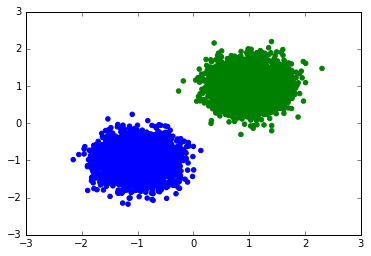

In [9]:
x11, x12 = np.random.multivariate_normal([1, 1], 0.1 * np.eye(2), 5000).T
x21, x22 = np.random.multivariate_normal([-1, -1], 0.1 * np.eye(2), 5000).T

x_ = np.array([np.concatenate([x11, x21]),
              np.concatenate([x12, x22])]).T
y_ = np.array([0] * 5000 + [1] * 5000)

plt.scatter(x_[:,0], x_[:,1], color=['g'] * 5000 + ['b'] * 5000)
plt.show()

Loss function

$\text{loss} = (y - \hat{y})^2$

In [10]:
target = tf.placeholder(tf.float32)
loss   = (prediction - target) ** 2

Optimizer

In [11]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
optimize  = optimizer.minimize(loss)

Training

In [12]:
loss_history = []

for _ in range(1000):
    index = np.random.randint(0, 10000)
    placeholder_values = {
        x:      x_[index],
        target: y_[index]
    }
    
    optimize.run(placeholder_values)
    loss_history.append(loss.eval(placeholder_values))

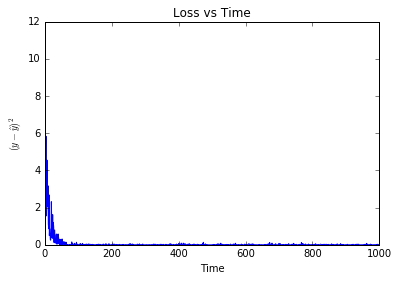

In [13]:
plt.plot(range(len(loss_history)), np.array(loss_history))
plt.xlabel('Time')
plt.ylabel('$(y - \hat{y}) ^ 2$')
plt.title('Loss vs Time')
plt.show()

In [14]:
print tf.global_variables()[-2]
w = tf.global_variables()[-2].eval()
print w

<tf.Variable 'Weight:0' shape=(2,) dtype=float32_ref>
[-0.20515151 -0.24673742]


In [15]:
print tf.global_variables()[-1]
b = tf.global_variables()[-1].eval()
print b

<tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>
[ 0.50244343]


In [16]:
results = []

for index in range(10000):
    placeholder_values = {
        x:      x_[index]
    }
    
    results.append(prediction.eval(placeholder_values))

In [17]:
print 'Correctly classified', np.count_nonzero(np.squeeze(np.round(results).astype(np.int32)) == y_), '/', len(y_)

Correctly classified 10000 / 10000


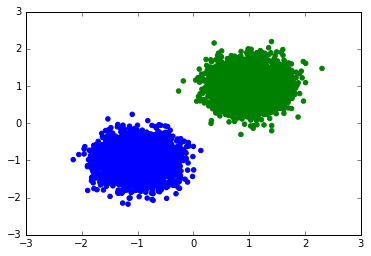

In [18]:
colors = ['g' if pred == 0 else 'b' for pred in results]
plt.scatter(x_[:,0], x_[:,1], color=['g'] * 5000 + ['b'] * 5000)
plt.show()

# Neuron

$h = W x + b$  
$\hat{y} = \sigma(h)$

In [19]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

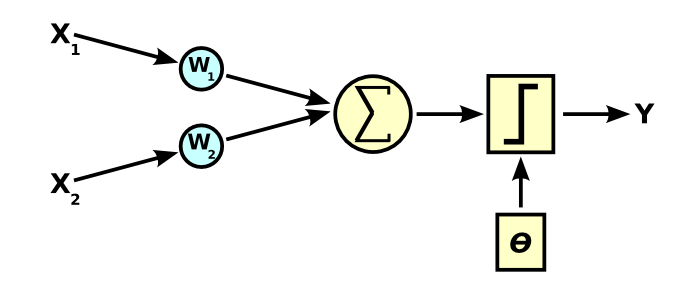

In [20]:
Image("./images/Neuron.png")

In [21]:
def get_neuron(x):
    W = tf.Variable(np.array([1.,1.]), 
                    dtype=tf.float32,
                    name="Weight")
    
    b = tf.Variable(np.array([0.],),
                    dtype=tf.float32,
                    name="bias")

    prod = tf.reduce_sum(W * x) + b
    neuron = 1 / (1 + tf.exp(-prod))
    
    return neuron

In [22]:
x = tf.placeholder(tf.float32, name="input")
prediction = get_neuron(x)

In [23]:
tf.global_variables_initializer().run()

In [24]:
prediction.eval({x: np.array([2, 3])})

array([ 0.99330717], dtype=float32)

In [25]:
# Sanity check
1 / (1 + np.exp(-5))

0.99330714907571527

Training, etc. as shown for the perceptron.

In [26]:
target = tf.placeholder(tf.float32)
loss   = (prediction - target) ** 2

In [27]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
optimize  = optimizer.minimize(loss)

In [28]:
loss_history = []

for _ in range(1000):
    index = np.random.randint(0, 10000)
    placeholder_values = {
        x:      x_[index],
        target: y_[index]
    }
    
    optimize.run(placeholder_values)
    loss_history.append(loss.eval(placeholder_values))

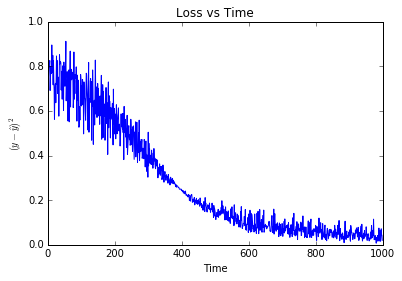

In [29]:
plt.plot(range(len(loss_history)), np.array(loss_history))
plt.xlabel('Time')
plt.ylabel('$(y - \hat{y}) ^ 2$')
plt.title('Loss vs Time')
plt.show()

In [30]:
results = []

for index in range(10000):
    placeholder_values = {
        x:      x_[index]
    }
    
    results.append(prediction.eval(placeholder_values))

In [31]:
print 'Correctly classified', np.count_nonzero(np.squeeze(np.round(results).astype(np.int32)) == y_), '/', len(y_)

Correctly classified 10000 / 10000


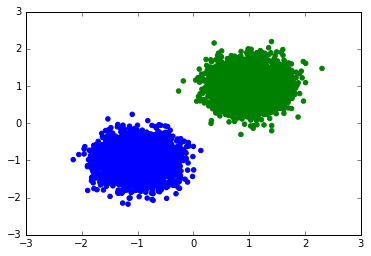

In [32]:
colors = ['g' if pred == 0 else 'b' for pred in results]
plt.scatter(x_[:,0], x_[:,1], color=['g'] * 5000 + ['b'] * 5000)
plt.show()